In [1]:
import pandas as pd
df=pd.read_csv('../Datasets/height-weight.csv')

In [4]:
df.head()
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [5]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [6]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


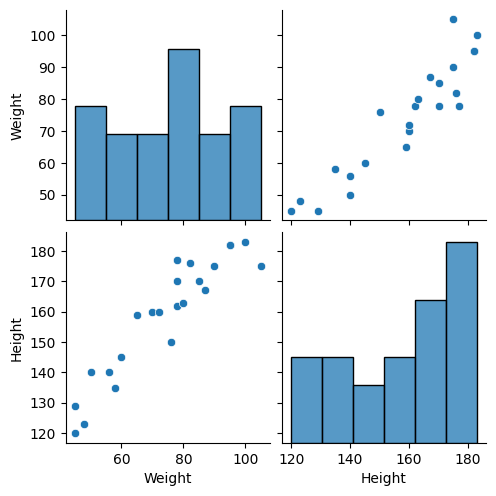

In [9]:
import seaborn as sns
sns.pairplot(df, height=2.5)

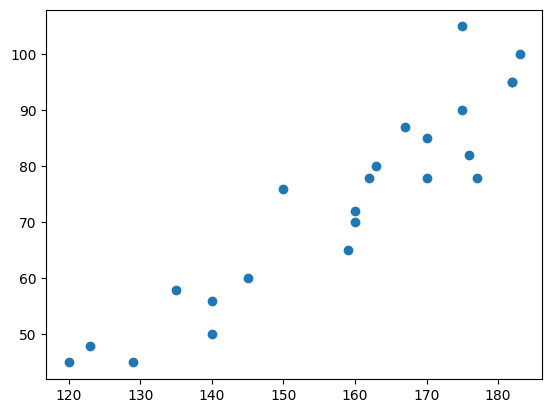

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df['Height'], df['Weight'])

In [15]:
X=df[['Weight']]
y=df['Height']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [23]:
import numpy as np
model.coef_, model.intercept_

(array([16.57062288]), np.float64(159.55555555555554))

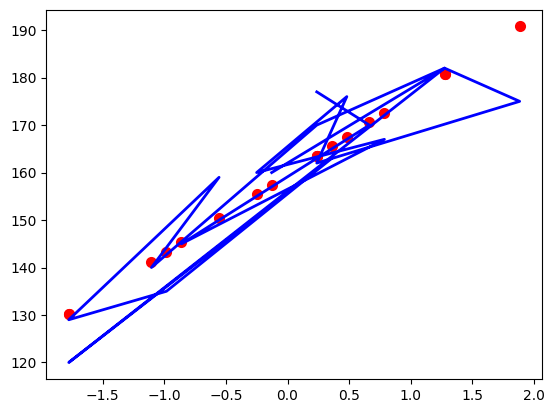

In [29]:
plt.scatter(X_train,model.predict(X_train), color='red', linewidth=2)
plt.plot(X_train, y_train, color='blue', linewidth=2)

In [30]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)

(53.14680928802527, 5.954671931677291)

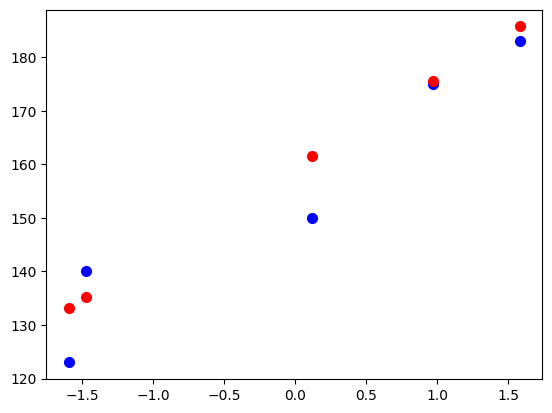

In [31]:
plt.scatter(X_test, y_test, color='blue', linewidth=2)
plt.scatter(X_test, y_pred, color='red', linewidth=2)